# 线性回归的简洁实现

> 通过使用深度学习框架来简洁实现 线性回归模型 生成数据集

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils import data
from d2l import torch as d2l

In [2]:
true_w = torch.tensor([2., -3.5])
true_w = torch.tensor([[2.,]])
true_b = 3.1

features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [3]:
features.min(), features.max()

(tensor(-3.0266), tensor(3.3783))

In [4]:
features = torch.randn(size=(1000, 1)) # 生成原始的特征
# features, _ = features.sort(dim=0)
labels = features@true_w + true_b

features.min(), features.max()

(tensor(-3.1733), tensor(3.5669))

In [5]:
features.shape, labels.shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

/root/miniconda3/envs/d2l/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/d2l/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/d2l/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


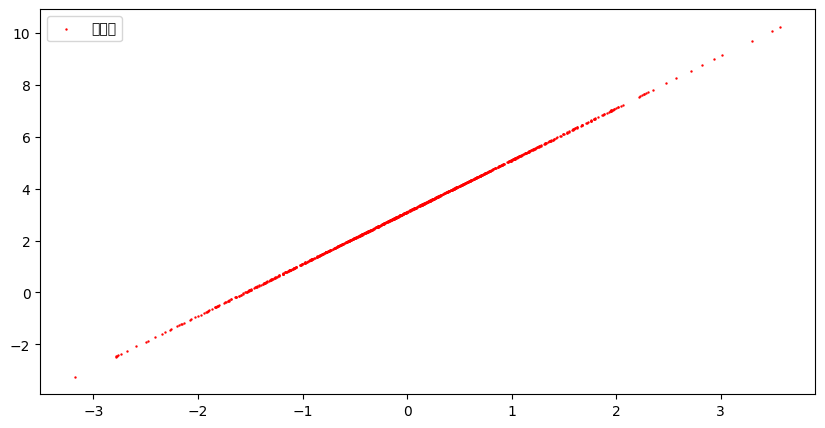

In [6]:
plt.figure(figsize=(10, 5))
# plt.title("")
plt.scatter(features, labels, s=0.5, c='r', label='数据集')
plt.legend()
plt.show()

### 调用框架现有的API读取数据

In [7]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch的数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train) 

In [8]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [9]:
next(iter(data_iter))

[tensor([[-0.1781],
         [ 0.3621],
         [-1.1553],
         [-0.5749],
         [ 0.5657],
         [-1.7521],
         [ 1.0158],
         [ 1.9651],
         [ 0.0066],
         [ 0.0293]]),
 tensor([[ 2.7439],
         [ 3.8241],
         [ 0.7893],
         [ 1.9502],
         [ 4.2314],
         [-0.4042],
         [ 5.1315],
         [ 7.0302],
         [ 3.1132],
         [ 3.1586]])]

### 使用框架预定义好的层

In [10]:
from torch import nn

In [11]:
net = nn.Sequential(nn.Linear(features.shape[-1], 1))

### 初始化模型参数 

In [12]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 计算均方误差使用 MSELoss类， 也称L2范数

In [13]:
loss = nn.MSELoss()

### 实例化SGD实例

In [14]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

### 训练

In [15]:
num_epochs = 3

for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()  # 参数更新
    l = loss(net(features), labels)
    print(f"epoch {epoch + 1}, loss {l:f}")

epoch 1, loss 0.000045
epoch 2, loss 0.000000
epoch 3, loss 0.000000


In [16]:
state_dict = net.state_dict()

In [17]:
w = float(state_dict['0.weight'])
b = float(state_dict['0.bias'])

x = np.linspace(features.min(), features.max(), 1000)
y = x * w + b

In [18]:
w, b

(1.9999998807907104, 3.0999984741210938)

/root/miniconda3/envs/d2l/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/d2l/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/d2l/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/d2l/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


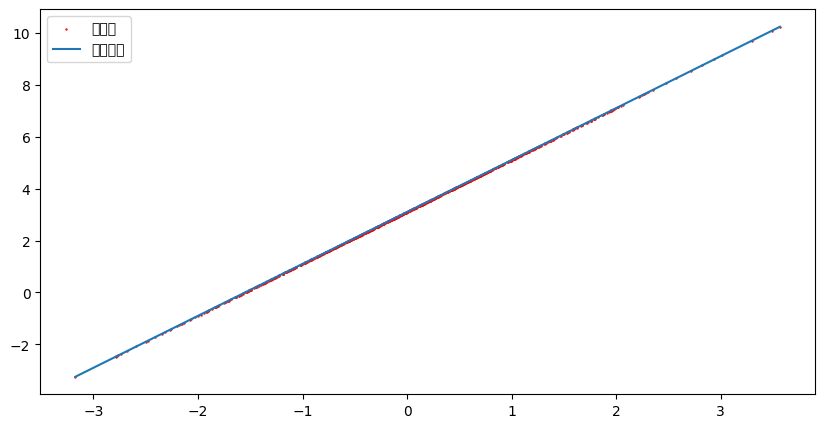

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(features, labels, s=0.5, c='r', label='数据集')
plt.plot(x, y, label='拟合曲线')
plt.legend()
plt.show()